In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import mplleaflet
import os

sn.set_context('poster')

In [2]:
# Optionally suppress deprecation warnings
import warnings
warnings.filterwarnings("ignore")

# Checking of Bago water chemistry data

Following a meeting with John Rune on 07/02/2017, it was decided that I should try entering the Myanmar data from Bago River into the Aquamonitor input template. This notebook plots the data to check for any obvious problems.

In [3]:
# Read data
in_xlsx = r'C:\Data\James_Work\Staff\John_Rune_S\Myanmar\Bago_Data\Myanmar_Simplified_Input_Template.xlsx'

stn_df = pd.read_excel(in_xlsx, sheetname='Stations')
val_df = pd.read_excel(in_xlsx, sheetname='Water samples')

## 1. Map of sites

Co-ordinates have not been entered for all the sites, but those with geographic data are shown on the map below. They all look to be located in the Bago area, which is a good start!

In [4]:
# Ignore sites with incomplete data
df = stn_df.dropna(how='any')

# Plot map
plt.scatter(df['LONGITUDE'], df['LATITUDE'], c='r', s=50)
mplleaflet.display()

## 2. Plot time series

The code below creates PNG plots all the water chemistry data for each site. This makes it possible to check the data for obvious errors.

In [5]:
%%capture
# The above line suppresses output so the plots are saved but not displayed

# Folder in which to save PNGs
png_fold = r'C:\Data\James_Work\Staff\John_Rune_S\Myanmar\Bago_Data\PNGs'

# Loop over stations
for stn in stn_df['STATION_CODE'].values:
    # Get just data for this stn
    df = val_df.query('STATION_CODE=="%s"' % stn)

    # Plot each series
    order = df['SAMPLE_DATE'].unique().astype('datetime64[D]')
    sn.factorplot(x='SAMPLE_DATE', y='VALUE', order=order,
                  data=df, col='METHOD_NAME', col_wrap=4,
                  sharex=True, sharey=False, aspect=2)
    plt.tight_layout()
    
    # Save
    png_path = os.path.join(png_fold, '%s.png' % stn)
    plt.savefig(png_path, dpi=300)

The plot below shows all the data together (but this is much more difficult to read, so it's probably better to consult the PNGs instead).

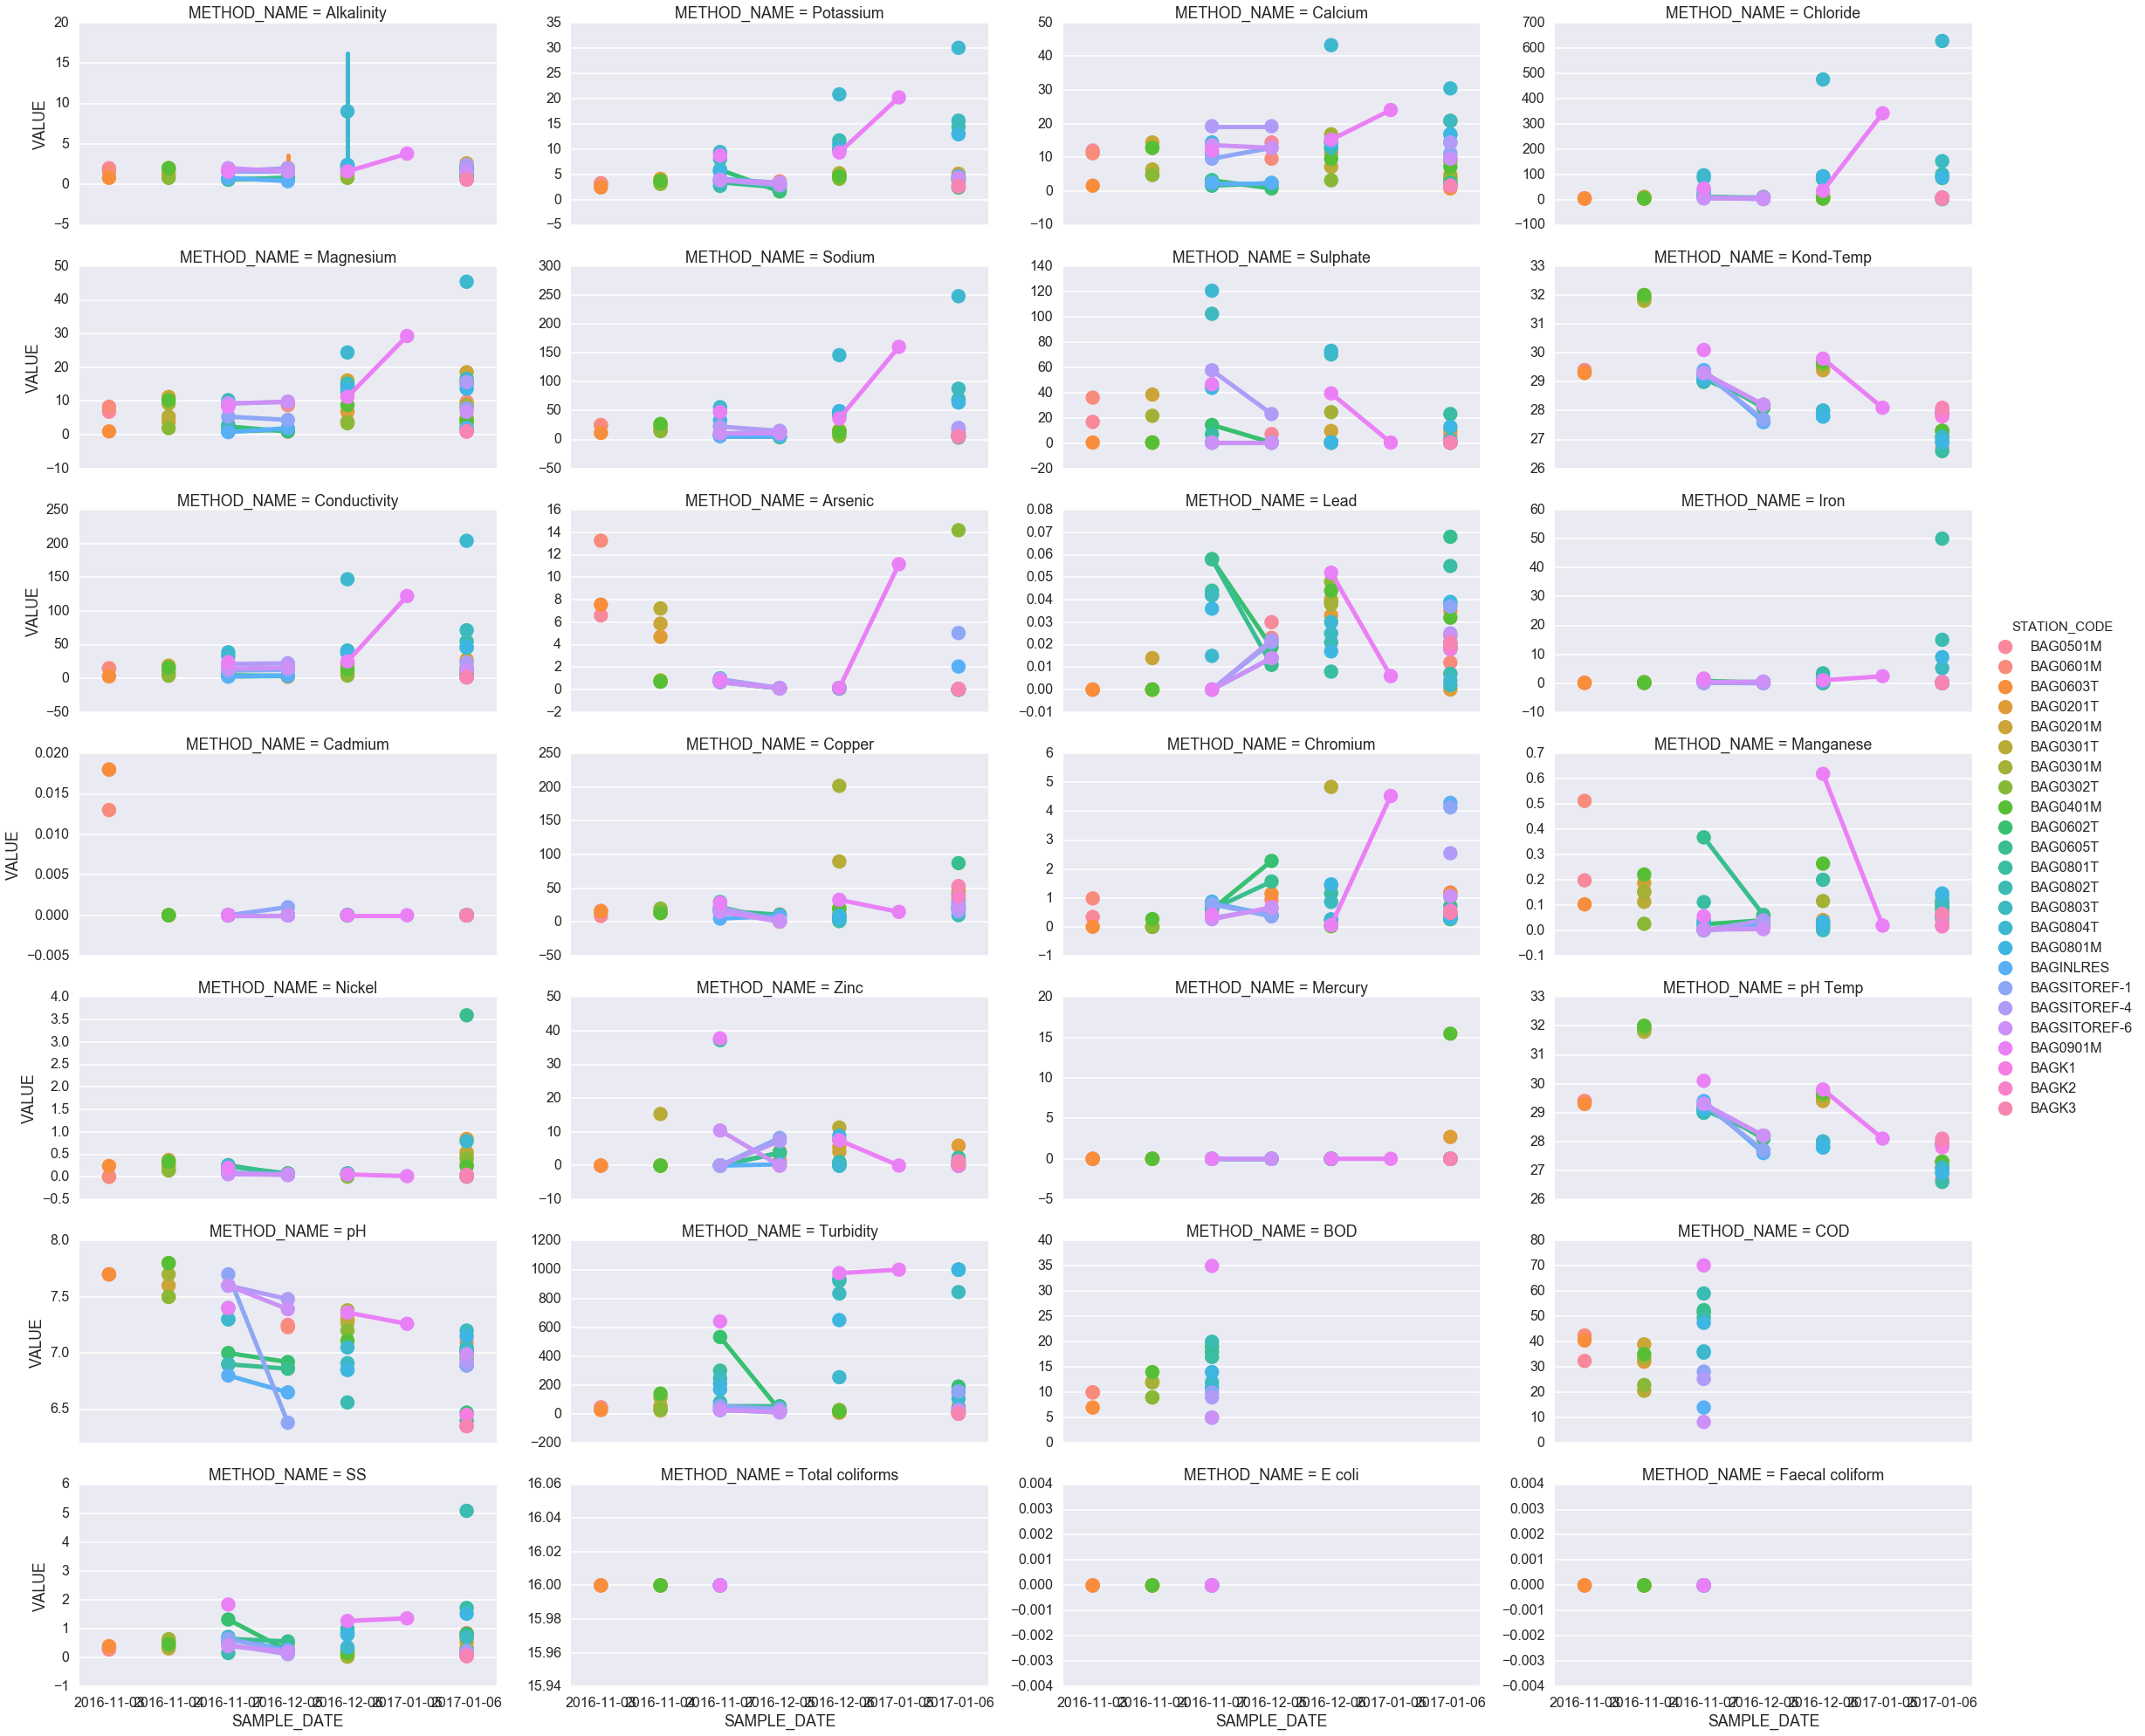

In [6]:
# Plot each series
order = val_df['SAMPLE_DATE'].unique().astype('datetime64[D]')
sn.factorplot(x='SAMPLE_DATE', y='VALUE', hue='STATION_CODE',
              order=order, data=val_df, col='METHOD_NAME', 
              col_wrap=4, sharex=True, sharey=False, aspect=2)

Based on a very quick check, these data look OK, but the plots highlight a couple of issues for alkalinity:

 * At site BAG0501M, there are two substantially different measurements for Alkalinity from 05/12/2016. <br><br>
 
 * At site BAG0603T, there are two substantially different measurements for Alkalinity from 05/12/2016. <br><br>
 
 * At site BAG0804T, there are two substantially different measurements for Alkalinity from 06/12/2016.